<a href="https://colab.research.google.com/github/AmirHoseein99/HandsOnAI_Excersies/blob/master/Chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import joblib
from word2number import w2n
import re
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
img = mnist['data']
label = mnist['target']
img.shape

(70000, 784)

In [ ]:
label = label.astype(int)
label[1]

0

<AxesSubplot:>

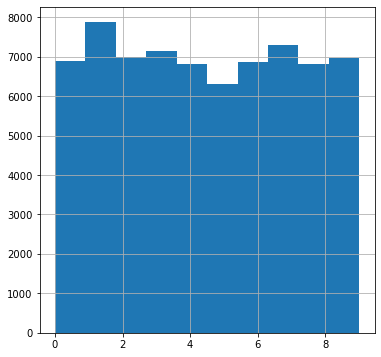

In [ ]:
label.hist(figsize=(6, 6))

In [ ]:
X_train, X_test, y_train, y_test = img[:60000], img[60000:], label[:60000], label[60000:]

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
# params = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
#           'C': [.5, .2, 2, 1.5, 3, 5 , 4],
#           'degree' : [3, 5, 6, 7, 8, 9, 10],
#           'probability' : [True]
# gridcv = GridSearchCV(svmclf, params, return_train_score=True, cv=5)
# res = gridcv.fit(X_train, y_train)

In [ ]:
svmclf = SVC()
cross_val_score(svmclf, X= X_train, y=y_train, scoring="accuracy", cv = 3)

array([0.977 , 0.9738, 0.9739])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)

In [ ]:
print(f"accuracy{accuracy_score(y_test, y_pred)}, f1 {f1_score(y_test, y_pred, average='micro')}"  )

accuracy0.9792, f1 0.9792


<AxesSubplot:>

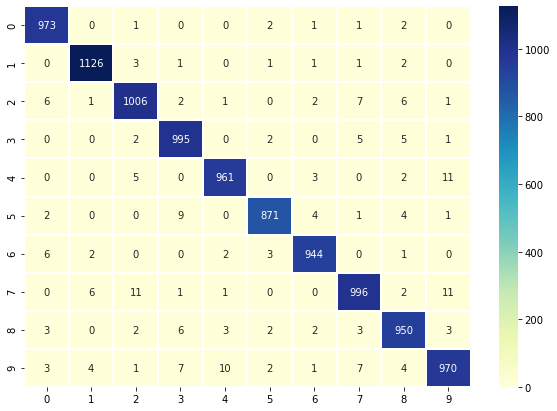

In [ ]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, cmap="YlGnBu", annot=True ,linewidths=1, fmt="d", )